# Import Modules

In [341]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
from tkinter import filedialog as fd
import time
import tracemalloc

# Take the input data

In [342]:
filename = fd.askopenfilename()
df = pd.read_csv(filename, header=None,skiprows=1)
df.head(10)
last_col = df.keys()[-1]
print('Target Attribute is: ', last_col)

Target Attribute is:  10


# Data preprocessing

### Missing values imputation

In [343]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [344]:
df=df.fillna(df.mean())

In [345]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


### Exploratory Data Analysis 

In [346]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Creating a correlation matrix 

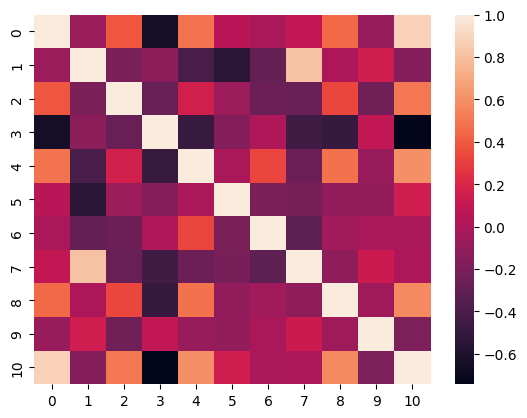

In [347]:
correlationMatrix=df.corr()
dataplot=sns.heatmap(correlationMatrix)  
plt.show()

### Identifying highly correlated features in the dataframe 

In [348]:
upper = correlationMatrix.where(np.triu(np.ones(correlationMatrix.shape), k=1).astype(np.bool))
# Find the feature column index with a correlation greater than 0.95.
colToDrop = [column for column in upper.columns if any(upper[column] > 0.95)]

C:\Users\villu\AppData\Local\Temp\ipykernel_46716\1327407657.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = correlationMatrix.where(np.triu(np.ones(correlationMatrix.shape), k=1).astype(np.bool))


### Dropping highly correlated features in the dataframe

In [349]:
df.drop(df[colToDrop], axis=1)

,0,1,2,3,4,5,6,7,8,9,10
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


# Implementation

## Node class

In [350]:
class Node():
    def __init__(self, featureIndex=None, threshold=None, left=None, right=None, varInformationGain=None, value=None):
        
        # initializing values for decision node
        self.featureIndex = featureIndex
        self.threshold = threshold
        self.left = left
        self.right = right
        self.varInformationGain = varInformationGain
        
        # initializing values for leaf node
        self.value = value

## Tree class 

In [351]:
class DecisionTreeClassifier():
    def __init__(self, minSampleSplit=2, maximumDepth=2):
        
        # initialize the root of the tree 
        self.root = None
        
        #stopping conditions
        self.minSampleSplit = minSampleSplit
        self.maximumDepth = maximumDepth
        
    def generateTree(self, dataset, currentDepth=0): ###Recursive function to generate the tree
        
        X = dataset[:,:-1]
        Y = dataset[:,-1]
        totalSamples, totalFeatures = np.shape(X)
        
        # split until stopping conditions are met
        if totalSamples>=self.minSampleSplit and currentDepth<=self.maximumDepth:
            # find the most optimal split
            optimalSplit = self.getOptimalSplit(dataset, totalSamples, totalFeatures,metrics)
            # check if information gain is positive
            if optimalSplit["varInformationGain"]>0:
                # recur left
                leftSubtree = self.generateTree(optimalSplit["leftDataset"], currentDepth+1)
                # recur right
                rightSubtree = self.generateTree(optimalSplit["rightDataset"], currentDepth+1)
                # return decision node
                return Node(optimalSplit["featureIndex"], optimalSplit["threshold"], 
                            leftSubtree, rightSubtree, optimalSplit["varInformationGain"])
        
        # compute leaf node
        leafValue = self.calculateLeafValue(Y)
        # return leaf node
        return Node(value=leafValue)
    
    def getOptimalSplit(self, dataset, totalSamples, totalFeatures, metrics): ###function to find the optimal split
        
        # dictionary to store the optimal split
        optimalSplit = {}
        maximumInfoGain = -float("inf")
        
        # loop over the features
        for featureIndex in range(totalFeatures):
            featureValues = dataset[:, featureIndex]
            possible_thresholds = np.unique(featureValues)
            # loop over the feature values present in the dataset
            for threshold in possible_thresholds:
                # get current split
                leftDataset, rightDataset = self.split(dataset, featureIndex, threshold)
                # check if childs are not null
                if len(leftDataset)>0 and len(rightDataset)>0:
                    y, leftOfY, rightOfY = dataset[:, -1], leftDataset[:, -1], rightDataset[:, -1]
                    # calculate information gain
                    currentInfoGain = self.informationGain(y, leftOfY, rightOfY, metrics)
                    # update the optimal split if needed
                    if currentInfoGain>maximumInfoGain:
                        optimalSplit["featureIndex"] = featureIndex
                        optimalSplit["threshold"] = threshold
                        optimalSplit["leftDataset"] = leftDataset
                        optimalSplit["rightDataset"] = rightDataset
                        optimalSplit["varInformationGain"] = currentInfoGain
                        maximumInfoGain = currentInfoGain
                        
        # return optimal split
        return optimalSplit
    
    def split(self, dataset, featureIndex, threshold): ###function to split the data 
        leftData=[]
        rightData=[]
        for row in dataset:
            if(row[featureIndex]<=threshold):
                leftData.append(row)
            else:
                rightData.append(row)
        leftDataset = np.array(leftData)
        rightDataset = np.array(rightData)
        return leftDataset, rightDataset
    
    def informationGain(self, parent, leftChild, rightChild, metrics):   ###function to compute information gain
        
        weightOfLeft = len(leftChild) / len(parent)
        weightOfRight = len(rightChild) / len(parent)
        if metrics=="gini": ##using gini index
            gain = self.giniIndex(parent) - (weightOfLeft*self.giniIndex(leftChild) + weightOfRight*self.giniIndex(rightChild))
        elif metrics=="entropy": ##using entropy
            gain = self.entropy(parent) - (weightOfLeft*self.entropy(leftChild) + weightOfRight*self.entropy(rightChild))
        else: ##using gain ratio
            gain = self.gainRatio(parent) - (weightOfLeft*self.gainRatio(leftChild) + weightOfRight*self.gainRatio(rightChild))
        return gain
    
    def giniIndex(self, y):  ###function to compute gini index
        
        classLabels = np.unique(y)
        gini = 0
        for cls in classLabels:
            probablityOfClass = len(y[y == cls]) / len(y)
            gini += probablityOfClass**2
        return 1 - gini
    
    def entropy(self, y):  ###function to compute entropy 
        
        classLabels = np.unique(y)
        entropy = 0
        for cls in classLabels:
            probablityOfClass = len(y[y == cls]) / len(y)
            entropy += -probablityOfClass * np.log2(probablityOfClass)
        return entropy
    
    def gainRatio(self, y):  ###function to compute gain ratio 
        classLabels = np.unique(y)
        gain = 0
        for cls in classLabels:
            probablityOfClass = len(y[y == cls]) / len(y)
            gain += -probablityOfClass * np.log2(probablityOfClass)
        gain = gain / 2 ##binary classification
        return gain
        
    def calculateLeafValue(self, Y):  ###function to compute leaf node 
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def printTree(self, tree=None, indent=" "):        ###function to print the tree
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.featureIndex), "<=", tree.threshold, "?", tree.varInformationGain)
            print("%sleft:" % (indent), end="")
            self.printTree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.printTree(tree.right, indent + indent)
            
    def fit(self, X, Y, metrics): ###function to train the tree 
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.generateTree(dataset)
    
    def predict(self, X):  ###function to predict new dataset 
        
        preditions = [self.makePrediction(x, self.root) for x in X]
        return preditions
    
    def makePrediction(self, x, tree):  ###function to predict a single data point
        
        if tree.value!=None: return tree.value
        featureValues = x[tree.featureIndex]
        if featureValues<=tree.threshold:
            return self.makePrediction(x, tree.left)
        else:
            return self.makePrediction(x, tree.right)

## Train-Test Split 

In [352]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=.2)

## Fit the model

In [353]:
start=time.time()
tracemalloc.start()
classifier = DecisionTreeClassifier(minSampleSplit=3, maximumDepth=3)
metrics="gini"
classifier.fit(XTrain,YTrain,metrics)
end=time.time()

In [354]:
classifier.printTree()

X_0 <= 68.0 ? 0.2786332179930795
 left:1.0
 right:X_0 <= 146.0 ? 0.3228289473684211
  left:2.0
  right:X_0 <= 184.0 ? 0.32905229581129863
    left:X_0 <= 163.0 ? 0.3694359866608669
        left:3.0
        right:5.0
    right:7.0


## Test the model 

In [355]:
YPredicted = classifier.predict(XTest) 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import svm

print("Accuracy score of the classifier by using",metrics,"as an ASM is: ",accuracy_score(YTest, YPredicted)*100)  
print("Precision of the classifier by using",metrics,"as an ASM is: ",precision_score(YTest, YPredicted,average='macro')*100)
print("Recall score of the classifier by using",metrics,"as an ASM is: ",recall_score(YTest, YPredicted,average='macro')*100)
print("F1 score of the classifier by using",metrics,"as an ASM is: ",f1_score(YTest, YPredicted,average='macro')*100)

#Create a svm Classifier
from sklearn import svm
svmClassifier = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(XTrain, YTrain)
y_pred = clf.predict(XTest)
YPredicted = classifier.predict(XTest) 
print("Accuracy score of the classifier by using SVM is: ",accuracy_score(YTest, YPredicted)*100)  
print("Precision of the classifier by using SVM is: ",precision_score(YTest, YPredicted,average='macro')*100)
print("Recall score of the classifier by using SVM is: ",recall_score(YTest, YPredicted,average='macro')*100)
print("F1 score of the classifier by using SVM is: ",f1_score(YTest, YPredicted,average='macro')*100)


Accuracy score of the classifier by using gini as an ASM is:  93.02325581395348
Precision of the classifier by using gini as an ASM is:  78.33333333333333
Recall score of the classifier by using gini as an ASM is:  81.57894736842107
F1 score of the classifier by using gini as an ASM is:  79.7017797017797
Accuracy score of the classifier by using SVM is:  93.02325581395348
Precision of the classifier by using SVM is:  78.33333333333333
Recall score of the classifier by using SVM is:  81.57894736842107
F1 score of the classifier by using SVM is:  79.7017797017797


C:\Users\villu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\villu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\villu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [356]:
confusion_matrix(YTest,YPredicted)

array([[17,  2,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  5]], dtype=int64)

In [357]:
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")
memory=tracemalloc.get_traced_memory()
tracemalloc.stop()

The time of execution of above program is : 1273.653268814087 ms


In [358]:
print("Current memory usage ",memory[0],"KB")
print("Peak memory usage ",memory[1],"KB")

Current memory usage  68443 KB
Peak memory usage  155667 KB
